## Definir 50 elementos estructurantes

In [1]:
import numpy as np 

elementos_estructurantes = {
    1 : np.matrix([[0,	0,	0,	0,	0], [0,	0,	0,	0,	0,], [1,	1,	1,	1,	1], [0,	0,	0,	0,	0], [0,	0,	0,	0,	0]]),
    
    2 : np.matrix([[0,    0,   1,   0,   0], [0,	0,	1,	0,	0,], [0,	0,	1,	0,	0], [0,	0,	1,	0,	0], [0,	0,	1,	0,	0]]),

    3 : np.matrix([[1,	0,	0,	0,	0], [0,	1,	0,	0,	0,], [0,	0,	1,	0,	0], [0,	0,	0,	1,	0], [0,	0,	0,	0,	1]]), 

    4 : np.matrix([[0,	0,	0,	0,	1], [0,	0,	0,	1,	0,], [0,	0,	1,	0,	0], [0,	1,	0,	0,	0], [1,	0,	0,	0,	0]]), 

    5 : np.matrix([[0,	0,	1,	0,	0], [0,	0,	1,	0,	0,], [1,	1,	1,	1,	1], [0,	0,	1,	0,	0], [0,	0,	1,	0,	0]]), 

    6 : np.matrix([[1,	0,	0,	0,	1], [0,	1,	0,	1,	0,], [0,	0,	1,	0,	0], [0,	1,	0,	1,	0], [1,	0,	0,	0,	1]]), 

    7 : np.matrix([[0,	0,	1,	1,	1], [0,	0,	1,	0,	0,], [0,	0,	1,	0,	0], [0,	0,	1,	0,	0], [1,	1,	1,	0,	0]]), 

    8 : np.matrix([[1,	1,	1,	0,	0], [0,	0,	1,	0,	0,], [0,	0,	1,	0,	0], [0,	0,	1,	0,	0], [0,	0,	1,	1,	1]]),

    9 : np.matrix([[0,	0,	0,	0,	1], [0,	0,	0,	1,	0,], [0,	0,	1,	0,	0], [0,	0,	0,	1,	0], [0,	0,	0,	0,	1]]), 

    10 : np.matrix([[1,	0,	0,	0,	0], [0,	1,	0,	0,	0,], [0,	0,	1,	0,	0], [0,	1,	0,	0,	0], [1,	0,	0,	0,	0]]), 

    11 : np.matrix([[1,	0,	0,	0,	1], [0,	1,	0,	1,	0,], [0,	0,	1,	0,	0], [0,	0,	0,	0,	0], [0,	0,	0,	0,	0]]), 

    12 : np.matrix([[0,	0,	0,	0,	0], [0,	0,	0,	0,	0,], [0,	0,	1,	0,	0], [0,	1,	0,	1,	0], [1,	0,	0,	0,	1]]), 

    13 : np.matrix([[1,	0,	0,	0,	0], [1,	0,	0,	0,	0,], [1,	0,	0,	0,	0], [0,	1,	0,	0,	0], [0,	0,	1,	1,	1]]), 

    14 : np.matrix([[0,	0,	0,	0,	1], [0,	0,	0,	0,	1,], [0,	0,	0,	0,	1], [0,	0,	0,	1,	0], [1,	1,	1,	0,	0]]), 

    15 : np.matrix([[0,	0,	1,	1,	1], [0,	1,	0,	0,	0,], [1,	0,	0,	0,	0], [1,	0,	0,	0,	0], [1,	0,	0,	0,	0]]), 

    16 : np.matrix([[1,	1,	1,	0,	0], [0,	0,	0,	1,	0,], [0,	0,	0,	0,	1], [0,	0,	0,	0,	1], [0,	0,	0,	0,	1]]),

    17 : np.matrix([[0,	0,	0,	0,	1], [0,	0,	0,	0,	1,], [1,	1,	1,	1,	1], [0,	0,	0,	0,	1], [0,	0,	0,	0,	1]]), 

    18 : np.matrix([[1,	1,	1,	1,	1], [0,	0,	1,	0,	0,], [0,	0,	1,	0,	0], [0,	0,	1,	0,	0], [0,	0,	1,	0,	0]]), 

    19 : np.matrix([[1,	0,	0,	0,	0], [1,	0,	0,	0,	0,], [1,	1,	1,	1,	1], [1,	0,	0,	0,	0], [1,	0,	0,	0,	0]]), 

    20 : np.matrix([[0,	0,	1,	0,	0], [0,	0,	1,	0,	0,], [0,	0,	1,	0,	0], [0,	0,	1,	0,	0], [1,	1,	1,	1,	1]]), 

    21 : np.matrix([[1,	0,	0,	0,	1], [1,	0,	0,	0,	1,], [1,	0,	0,	0,	1], [0,	1,	0,	1,	0], [0,	0,	1,	0,	0]]), 

    22 : np.matrix([[0,	0,	1,	0,	0], [0,	1,	0,	1,	0,], [1,	0,	0,	0,	1], [1,	0,	0,	0,	1], [1,	0,	0,	0,	1]]), 

    23 : np.matrix([[1,	1,	1,	0,	0], [0,	0,	0,	1,	0,], [0,	0,	0,	0,	1], [0,	0,	0,	1,	0], [1,	1,	1,	0,	0]]), 

    24 : np.matrix([[0,	0,	1,	1,	1], [0,	1,	0,	0,	0,], [1,	0,	0,	0,	0], [0,	1,	0,	0,	0], [0,	0,	1,	1,	1]]),

    25 : np.matrix([[0,	1,	1,	0,	0], [1,	0,	1,	0,	0,], [0,	0,	1,	0,	0], [0,	0,	1,	0,	1], [0,	0,	1,	1,	0]]), 

    26 : np.matrix([[0,	0,	1,	1,	0], [0,	0,	1,	0,	1,], [0,	0,	1,	0,	0], [1,	0,	1,	0,	0], [0,	1,	1,	0,	0]]), 

    27 : np.matrix([[0,	1,	0,	0,	0], [1,	0,	0,	0,	0,], [1,	1,	1,	1,	1], [0,	0,	0,	0,	1], [0,	0,	0,	1,	0]]), 

    28 : np.matrix([[0,	0,	0,	1,	0], [0,	0,	0,	0,	1,], [1,	1,	1,	1,	1], [1,	0,	0,	0,	0], [0,	1,	0,	0,	0]]),

    29 : np.matrix([[1,	0,	0,	0,	0], [1,	0,	0,	0,	0,], [1,	0,	1,	1,	1], [1,	0,	1,	0,	0], [1,	1,	1,	0,	0]]), 

    30 : np.matrix([[1,	1,	1,	1,	1], [1,	0,	0,	0,	0,], [1,	1,	1,	0,	0], [0,	0,	1,	0,	0], [0,	0,	1,	0,	0]]), 

    31 : np.matrix([[0,	0,	1,	1,	1], [0,	0,	1,	0,	1,], [1,	1,	1,	0,	1], [0,	0,	0,	0,	1], [0,	0,	0,	0,	1]]), 

    32 : np.matrix([[0,	0,	1,	0,	0], [0,	0,	1,	0,	0,], [1,	1,	1,	0,	0], [1,	0,	0,	0,	0], [1,	1,	1,	1,	1]]),

    33 : np.matrix([[0,	0,	1,	0,	0], [0,	0,	1,	0,	0,], [0,	0,	1,	0,	0], [0,	1,	0,	1,	0], [1,	0,	0,	0,	1]]), 

    34 : np.matrix([[1,	0,	0,	0,	0], [0,	1,	0,	0,	0,], [0,	0,	1,	1,	1], [0,	1,	0,	0,	0], [1,	0,	0,	0,	0]]),

    35 : np.matrix([[1,	0,	0,	0,	1], [0,	1,	0,	1,	0,], [0,	0,	1,	0,	0], [0,	0,	1,	0,	0], [0,	0,	1,	0,	0]]), 

    36 : np.matrix([[0,	0,	0,	0,	1], [0,	0,	0,	1,	0,], [1,	1,	1,	0,	0], [0,	0,	0,	1,	0], [0,	0,	0,	0,	1]]), 

    37 : np.matrix([[0,	0,	0,	0,	1], [0,	0,	0,	0,	1,], [1,	1,	1,	1,	1], [1,	0,	0,	0,	0], [1,	0,	0,	0,	0]]), 

    38 : np.matrix([[1,	0,	0,	0,	0], [1,	0,	0,	0,	0,], [1,	1,	1,	1,	1], [0,	0,	0,	0,	1], [0,	0,	0,	0,	1]]), 

    39 : np.matrix([[1,	0,	0,	1,	0], [1,	0,	1,	0,	0,], [1,	1,	0,	0,	0], [1,	0,	1,	0,	0], [1,	0,	0,	1,	0]]),

    40 : np.matrix([[0,	1,	0,	0,	1], [0,	0,	1,	0,	1,], [0,	0,	0,	1,	1], [0,	0,	1,	0,	1], [0,	1,	0,	0,	1]]),

    41 : np.matrix([[0,	0,	0,	0,	0], [1,	0,	0,	0,	1,], [0,	1,	0,	1,	0], [0,	0,	1,	0,	0], [1,	1,	1,	1,	1]]), 

    42 : np.matrix([[1,	1,	1,	1,	1], [0,	0,	1,	0,	0,], [0,	1,	0,	1,	0], [1,	0,	0,	0,	1], [0,	0,	0,	0,	0]]), 

    43 : np.matrix([[0,	1,	0,	1,	0], [0,	1,	0,	1,	0,], [1,	1,	1,	1,	1], [0,	1,	0,	1,	0], [0,	1,	0,	1,	0]]), 

    44 : np.matrix([[0,	0,	1,	0,	0], [1,	1,	1,	1,	1,], [0,	0,	1,	0,	0], [1,	1,	1,	1,	1], [0,	0,	1,	0,	0]]), 

    45 : np.matrix([[0,	0,	0,	0,	1], [0,	0,	0,	1,	1,], [0,	0,	1,	0,	1], [0,	1,	0,	0,	1], [1,	0,	0,	0,	1]]), 

    46 : np.matrix([[1,	0,	0,	0,	0], [1,	1,	0,	0,	0,], [1,	0,	1,	0,	0], [1,	0,	0,	1,	0], [1,	0,	0,	0,	1]]), 

    47 : np.matrix([[0,	1,	0,	0,	0], [1,	0,	0,	0,	0,], [1,	0,	0,	0,	0], [1,	0,	0,	0,	1], [0,	1,	1,	1,	0]]), 

    48 : np.matrix([[0,	1,	1,	1,	0], [1,	0,	0,	0,	1,], [0,	0,	0,	0,	1], [0,	0,	0,	0,	1], [0,	0,	0,	1,	0]]),

    49 : np.matrix([[1,	0,	0,	0,	1], [0,	1,	0,	0,	1,], [0,	0,	1,	0,	1], [0,	0,	0,	1,	1], [0,	0,	0,	0,	1]]), 

    50 : np.matrix([[0,	0,	1,	0,	0], [0,	1,	0,	1,	0,], [1,	0,	0,	0,	1], [0,	1,	0,	1,	0], [0,	0,	1,	0,	0]]), 
}

## Vamos a leer todas las imagenes generadas en el notebook 1-2, veamos una

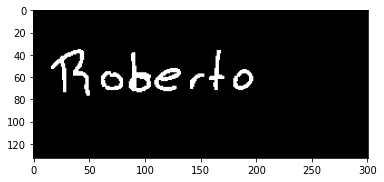

In [2]:
from matplotlib import pyplot as plt
import cv2
image = cv2.imread("../solo_dilation/dilation_WhatsApp Image 2020-09-21 at 10.06.09 PM.png")
plt.imshow(image)

## Definimos función para sumar los 1s dentro de la matriz

In [3]:
from scipy.ndimage import correlate
import numpy as np

def contar_1s(filename:str,elemnto_estructurante:np.ndarray):
    image = cv2.imread(filename)
    image_2d=image[:,:,0]
    corr=correlate(image_2d, elemnto_estructurante, mode='constant')
    return np.count_nonzero(corr)

In [4]:
# Tomemos el elemento estructurante #2 y la firma mostrada arriba para ver cuantos 1s obtenemos
contar_1s("../solo_dilation/dilation_WhatsApp Image 2020-09-21 at 10.06.09 PM.png",elementos_estructurantes[2])

2388

## Cargemos iterativamente todas las imágenes y corramos todos los elementos estructurantes

In [5]:
import glob 
import pandas as pd
def generar_tabla_de_valores(elementos_estructurantes:dict,folder:str='../solo_dilation/*.png'):
    dict_final={}
    for key in elementos_estructurantes:
        fila=[]
        for filepath in glob.iglob(folder):
            fila.append(contar_1s(filepath,elementos_estructurantes[key]))
        dict_final[key]=fila

    df=pd.DataFrame(dict_final)
    return df

In [6]:
df = generar_tabla_de_valores(elementos_estructurantes)
df.shape

(37, 50)

## Ya tenemos nuestra tabla de 37 firmas reales (filas) por 50 elementos estructurantes (columnas). Veamos las primeras cinco filas

In [7]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,4088,3313,4690,4095,4443,5200,4397,4837,3892,3896,...,4936,4934,4680,4779,4658,4961,4717,4704,4938,4475
1,2729,2524,3201,3088,3184,3631,3257,3326,2879,2850,...,3426,3428,3350,3367,3384,3430,3320,3306,3411,3206
2,3560,3012,4051,3736,3961,4613,4022,4227,3490,3496,...,4366,4367,4195,4243,4187,4349,4172,4162,4329,3982
3,2044,1715,2241,2209,2269,2641,2320,2365,2019,1985,...,2508,2509,2405,2449,2433,2425,2367,2376,2468,2295
4,2905,2583,3374,3117,3291,3792,3353,3484,2956,2933,...,3590,3590,3482,3506,3473,3593,3455,3448,3585,3318


## Vemos la cantidad, promedio, desviación estandar, cuartiles, min y max de las columnas (elementos estructurantes)

In [8]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,2987.945946,2658.837838,3449.054054,3259.297297,3401.432432,3950.540541,3481.648649,3599.972973,3048.567568,3036.540541,...,3724.837838,3725.837838,3604.945946,3628.243243,3618.135135,3708.864865,3570.027027,3560.756757,3700.459459,3427.891892
std,615.302994,495.486939,704.531363,629.801153,666.265569,777.301693,670.229986,728.201380,579.818915,582.918786,...,737.255666,737.294171,698.820472,711.316596,701.218074,742.351188,704.548969,702.640275,739.935718,667.372784
min,1858.000000,1642.000000,2018.000000,2120.000000,2111.000000,2483.000000,2225.000000,2155.000000,1893.000000,1883.000000,...,2337.000000,2338.000000,2250.000000,2275.000000,2313.000000,2260.000000,2198.000000,2191.000000,2247.000000,2137.000000
25%,2597.000000,2388.000000,3031.000000,2891.000000,2985.000000,3461.000000,3073.000000,3168.000000,2709.000000,2684.000000,...,3267.000000,3265.000000,3180.000000,3180.000000,3201.000000,3252.000000,3131.000000,3129.000000,3240.000000,3010.000000
50%,2897.000000,2614.000000,3360.000000,3152.000000,3291.000000,3822.000000,3365.000000,3490.000000,2956.000000,2939.000000,...,3618.000000,3619.000000,3482.000000,3520.000000,3487.000000,3599.000000,3463.000000,3448.000000,3585.000000,3318.000000
75%,3176.000000,2872.000000,3721.000000,3485.000000,3662.000000,4239.000000,3741.000000,3880.000000,3302.000000,3277.000000,...,3995.000000,3993.000000,3892.000000,3892.000000,3877.000000,3982.000000,3842.000000,3824.000000,3982.000000,3698.000000
max,4508.000000,3926.000000,5269.000000,4899.000000,5040.000000,5918.000000,5148.000000,5498.000000,4506.000000,4494.000000,...,5576.000000,5576.000000,5349.000000,5410.000000,5335.000000,5596.000000,5336.000000,5328.000000,5601.000000,5068.000000


## Generamos un datos de entranamiento sintéticos

Utilizaremos una distribución de probabilidad normal centrada en 1 con desviación estándar 0.15, para generar datos sitnéticos positivos un 66% de las veces (1 $\sigma$) en +/- 15% del promedio de cada columna (elemento estructurante).

In [9]:
from numpy import random

def generar_datos_sinteticos_positivos(df:pd.DataFrame,df_original:pd.DataFrame):
    df_inner=df.copy()
    row = len(df_inner)
    for filepath in glob.iglob('../solo_dilation/*.png'):
        fila=[]
        for key in elementos_estructurantes:
            # Generación de datos de entranamiento sintéticos a partir 
            # de un número aleatorio obtenido de una función de distribución 
            # de probabilidad normal (promedio=1, std=0.15) 
            # multiplicado por el promedio de los valores originales de 0 al tamaño original
            rand = random.normal(loc=1,scale=.15)
            vec=df_inner[key][0:len(df_original[key])]
            fila.append(round(vec.mean()*rand))
        df_inner.loc[row]=fila
        row+=1
    return df_inner[len(df):]

In [10]:
df_original=df.copy()
sinteticos_positivos=generar_datos_sinteticos_positivos(df,df_original)
sinteticos_positivos['target']=1
sinteticos_positivos

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,target
37,2478,3152,4360,2964,2617,3275,3281,3953,2812,2928,...,4465,4506,3182,3569,4421,4541,3409,3485,2426,1
38,3787,2934,2261,3395,3494,3492,2268,3897,2888,2797,...,3601,3405,4559,3818,4024,3143,3904,3654,2812,1
39,3503,2374,3931,3334,2529,4936,3938,3576,3474,2624,...,4753,4155,4239,4381,3610,2413,4175,3612,2502,1
40,3220,3222,3383,2616,3809,3770,4213,3125,3455,3032,...,3578,3785,3922,2338,2620,3090,3749,3280,3179,1
41,3013,2201,2936,3688,3279,4692,3784,3292,3060,3579,...,3488,3727,3564,3913,3675,3677,3954,3873,3298,1
42,3053,2705,3480,3069,4218,4313,2924,2506,2797,3016,...,3686,4809,3977,3368,3799,2989,3646,4150,3445,1
43,2927,2401,3817,3709,3869,3766,3241,3706,3501,3340,...,4083,3358,2374,4226,4285,2949,3600,4656,2974,1
44,3122,2125,3501,3923,2114,3897,2975,3434,2818,2749,...,4193,3228,4106,4143,3969,2648,4222,3481,3415,1
45,3601,2886,3167,2970,3540,5439,3565,3727,4081,2726,...,3312,4218,3202,3357,2990,4082,3597,3853,3776,1
46,3089,2361,3389,2939,3105,3539,3469,3134,2973,3434,...,3540,4323,3915,3630,3594,3607,3121,3903,3792,1


## Observamos que los estadísticos de cada columna no cambian significativamente con respecto a los datos originales como era de esperarse

In [11]:
df_original.describe()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,2987.945946,2658.837838,3449.054054,3259.297297,3401.432432,3950.540541,3481.648649,3599.972973,3048.567568,3036.540541,...,3724.837838,3725.837838,3604.945946,3628.243243,3618.135135,3708.864865,3570.027027,3560.756757,3700.459459,3427.891892
std,615.302994,495.486939,704.531363,629.801153,666.265569,777.301693,670.229986,728.201380,579.818915,582.918786,...,737.255666,737.294171,698.820472,711.316596,701.218074,742.351188,704.548969,702.640275,739.935718,667.372784
min,1858.000000,1642.000000,2018.000000,2120.000000,2111.000000,2483.000000,2225.000000,2155.000000,1893.000000,1883.000000,...,2337.000000,2338.000000,2250.000000,2275.000000,2313.000000,2260.000000,2198.000000,2191.000000,2247.000000,2137.000000
25%,2597.000000,2388.000000,3031.000000,2891.000000,2985.000000,3461.000000,3073.000000,3168.000000,2709.000000,2684.000000,...,3267.000000,3265.000000,3180.000000,3180.000000,3201.000000,3252.000000,3131.000000,3129.000000,3240.000000,3010.000000
50%,2897.000000,2614.000000,3360.000000,3152.000000,3291.000000,3822.000000,3365.000000,3490.000000,2956.000000,2939.000000,...,3618.000000,3619.000000,3482.000000,3520.000000,3487.000000,3599.000000,3463.000000,3448.000000,3585.000000,3318.000000
75%,3176.000000,2872.000000,3721.000000,3485.000000,3662.000000,4239.000000,3741.000000,3880.000000,3302.000000,3277.000000,...,3995.000000,3993.000000,3892.000000,3892.000000,3877.000000,3982.000000,3842.000000,3824.000000,3982.000000,3698.000000
max,4508.000000,3926.000000,5269.000000,4899.000000,5040.000000,5918.000000,5148.000000,5498.000000,4506.000000,4494.000000,...,5576.000000,5576.000000,5349.000000,5410.000000,5335.000000,5596.000000,5336.000000,5328.000000,5601.000000,5068.000000


## Ahora veamos los estadísticos de los datos sintéticos poisitivos

In [12]:
sinteticos_positivos.describe()

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,target
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0
mean,3144.216216,2657.567568,3361.432432,3315.486486,3241.189189,3940.162162,3367.783784,3465.459459,2947.918919,3035.081081,...,3771.027027,3609.189189,3624.081081,3570.459459,3476.972973,3487.459459,3629.972973,3855.351351,3474.432432,1.0
std,402.230181,445.615339,590.780065,524.983683,617.338546,554.228468,640.317202,469.754522,386.891413,385.647967,...,491.087766,583.595267,587.694383,527.895012,494.588352,537.891025,449.668612,556.440733,516.033727,0.0
min,2122.000000,1674.000000,2226.000000,1888.000000,1715.000000,2766.000000,1974.000000,2506.000000,2370.000000,2099.000000,...,3051.000000,2579.000000,2348.000000,2338.000000,1977.000000,2413.000000,2785.000000,2445.000000,2295.000000,1.0
25%,2987.000000,2361.000000,2996.000000,2983.000000,2912.000000,3539.000000,2981.000000,3207.000000,2647.000000,2742.000000,...,3485.000000,3228.000000,3202.000000,3232.000000,3151.000000,2989.000000,3374.000000,3481.000000,3179.000000,1.0
50%,3122.000000,2638.000000,3383.000000,3354.000000,3279.000000,3897.000000,3331.000000,3507.000000,2860.000000,3016.000000,...,3601.000000,3465.000000,3564.000000,3642.000000,3594.000000,3549.000000,3597.000000,3873.000000,3560.000000,1.0
75%,3503.000000,3044.000000,3774.000000,3634.000000,3662.000000,4311.000000,3784.000000,3764.000000,3079.000000,3340.000000,...,4083.000000,4111.000000,4061.000000,3915.000000,3799.000000,3866.000000,3839.000000,4313.000000,3792.000000,1.0
max,3885.000000,3623.000000,4681.000000,4574.000000,4420.000000,5439.000000,4688.000000,4295.000000,4081.000000,3762.000000,...,4899.000000,4809.000000,4680.000000,4429.000000,4421.000000,4541.000000,4705.000000,4745.000000,4327.000000,1.0


## Para la generación de datos sintéticos negativos. Tomaremos nuevamente una distribución de probabilidad normal (1,1). Pero ahora alrededor del 150

In [13]:
def generar_datos_sinteticos_negativos(df:pd.DataFrame):
    df_inner=df.copy()
    row = len(df_inner)
    for i in range(len(df_inner)):
        fila=[]
        for key in elementos_estructurantes:
            # Generación de datos de entranamiento sintéticos negativos a partir
            # de un número aleatorio obtenido de una función de distribución 
            # de probabilidad normal (promedio=1, std=1) 
            # multiplicado por 150
            rand = random.normal(loc=1,scale=1)
            fila.append(round(150*rand))
        df_inner.loc[row]=fila
        row+=1
    return df_inner[len(df):]

In [14]:
sinteticos_negativos=generar_datos_sinteticos_negativos(df)
sinteticos_negativos['target']=0
sinteticos_negativos

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,target
37,371,412,331,183,138,268,101,-75,70,284,...,192,222,314,294,56,119,272,-52,96,0
38,43,215,121,222,513,287,174,548,281,306,...,88,97,411,-29,-17,77,200,188,224,0
39,15,291,331,107,130,-240,186,69,258,153,...,247,51,379,261,156,320,279,489,75,0
40,206,108,310,33,288,91,219,148,146,105,...,240,304,134,299,153,158,164,252,-120,0
41,134,-94,199,104,159,42,216,435,406,5,...,80,350,335,46,324,16,168,62,259,0
42,105,217,-49,160,20,288,165,248,141,55,...,215,498,5,226,83,56,149,223,35,0
43,94,210,191,28,9,-54,89,241,114,276,...,243,188,139,-112,400,33,247,14,105,0
44,123,204,226,105,274,201,57,180,87,-44,...,75,-12,83,169,213,44,-251,185,9,0
45,263,165,33,41,158,185,53,158,197,110,...,-72,-1,68,371,318,79,289,228,8,0
46,311,274,564,-33,35,75,353,307,83,85,...,10,75,46,55,9,392,100,210,100,0


## Hagamos nuevamente el mismo experimento, y notemos que los estadísticos de los sintéticos negativos, son extremadamente diversos a los originales como queríamos

In [15]:
df_original.describe()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,2987.945946,2658.837838,3449.054054,3259.297297,3401.432432,3950.540541,3481.648649,3599.972973,3048.567568,3036.540541,...,3724.837838,3725.837838,3604.945946,3628.243243,3618.135135,3708.864865,3570.027027,3560.756757,3700.459459,3427.891892
std,615.302994,495.486939,704.531363,629.801153,666.265569,777.301693,670.229986,728.201380,579.818915,582.918786,...,737.255666,737.294171,698.820472,711.316596,701.218074,742.351188,704.548969,702.640275,739.935718,667.372784
min,1858.000000,1642.000000,2018.000000,2120.000000,2111.000000,2483.000000,2225.000000,2155.000000,1893.000000,1883.000000,...,2337.000000,2338.000000,2250.000000,2275.000000,2313.000000,2260.000000,2198.000000,2191.000000,2247.000000,2137.000000
25%,2597.000000,2388.000000,3031.000000,2891.000000,2985.000000,3461.000000,3073.000000,3168.000000,2709.000000,2684.000000,...,3267.000000,3265.000000,3180.000000,3180.000000,3201.000000,3252.000000,3131.000000,3129.000000,3240.000000,3010.000000
50%,2897.000000,2614.000000,3360.000000,3152.000000,3291.000000,3822.000000,3365.000000,3490.000000,2956.000000,2939.000000,...,3618.000000,3619.000000,3482.000000,3520.000000,3487.000000,3599.000000,3463.000000,3448.000000,3585.000000,3318.000000
75%,3176.000000,2872.000000,3721.000000,3485.000000,3662.000000,4239.000000,3741.000000,3880.000000,3302.000000,3277.000000,...,3995.000000,3993.000000,3892.000000,3892.000000,3877.000000,3982.000000,3842.000000,3824.000000,3982.000000,3698.000000
max,4508.000000,3926.000000,5269.000000,4899.000000,5040.000000,5918.000000,5148.000000,5498.000000,4506.000000,4494.000000,...,5576.000000,5576.000000,5349.000000,5410.000000,5335.000000,5596.000000,5336.000000,5328.000000,5601.000000,5068.000000


In [16]:
sinteticos_negativos.describe()

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,target
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0
mean,158.810811,172.054054,140.243243,136.540541,177.972973,141.297297,171.432432,191.648649,141.297297,130.081081,...,133.783784,166.891892,132.891892,181.162162,133.945946,144.162162,154.567568,136.837838,164.378378,0.0
std,139.084674,132.474934,138.303492,103.088849,132.435201,139.307586,119.601779,169.157917,141.299498,122.543502,...,122.140660,176.117824,142.302062,158.030678,155.624360,157.874689,137.467681,148.012671,141.257714,0.0
min,-107.000000,-127.000000,-113.000000,-108.000000,-132.000000,-240.000000,-83.000000,-185.000000,-141.000000,-87.000000,...,-99.000000,-287.000000,-137.000000,-188.000000,-181.000000,-213.000000,-251.000000,-169.000000,-120.000000,0.0
25%,82.000000,108.000000,24.000000,73.000000,85.000000,64.000000,110.000000,107.000000,15.000000,55.000000,...,64.000000,56.000000,46.000000,58.000000,16.000000,44.000000,97.000000,14.000000,94.000000,0.0
50%,129.000000,204.000000,122.000000,119.000000,165.000000,109.000000,165.000000,216.000000,141.000000,140.000000,...,131.000000,150.000000,129.000000,177.000000,136.000000,119.000000,168.000000,130.000000,153.000000,0.0
75%,241.000000,260.000000,211.000000,224.000000,261.000000,201.000000,229.000000,314.000000,228.000000,218.000000,...,226.000000,302.000000,240.000000,294.000000,213.000000,245.000000,261.000000,228.000000,260.000000,0.0
max,478.000000,412.000000,564.000000,332.000000,513.000000,571.000000,478.000000,548.000000,406.000000,447.000000,...,370.000000,511.000000,411.000000,620.000000,442.000000,427.000000,365.000000,489.000000,489.000000,0.0


## Anotemos ahora los datos originales con una nueva columna con el valro 1 cuando es una firma de nuestra persona de interés

In [17]:
df['target']=1
df

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,target
0,4088,3313,4690,4095,4443,5200,4397,4837,3892,3896,...,4934,4680,4779,4658,4961,4717,4704,4938,4475,1
1,2729,2524,3201,3088,3184,3631,3257,3326,2879,2850,...,3428,3350,3367,3384,3430,3320,3306,3411,3206,1
2,3560,3012,4051,3736,3961,4613,4022,4227,3490,3496,...,4367,4195,4243,4187,4349,4172,4162,4329,3982,1
3,2044,1715,2241,2209,2269,2641,2320,2365,2019,1985,...,2509,2405,2449,2433,2425,2367,2376,2468,2295,1
4,2905,2583,3374,3117,3291,3792,3353,3484,2956,2933,...,3590,3482,3506,3473,3593,3455,3448,3585,3318,1
5,1858,1642,2018,2120,2111,2483,2225,2155,1893,1883,...,2338,2250,2275,2313,2260,2198,2191,2247,2137,1
6,2887,2788,3508,3232,3413,3945,3494,3641,3131,3100,...,3692,3626,3611,3607,3728,3589,3578,3731,3437,1
7,3143,2745,3492,3460,3526,4132,3666,3676,3153,3143,...,3905,3739,3782,3809,3818,3688,3676,3818,3553,1
8,2934,2509,3348,3091,3275,3822,3323,3490,2912,2892,...,3619,3480,3520,3487,3599,3463,3442,3581,3304,1
9,3201,2872,3749,3467,3662,4239,3741,3882,3308,3277,...,3993,3892,3898,3871,3998,3849,3834,3997,3698,1


## Ahora vamos a juntar nuestros 3 dataframes, el que tiene las firmas reales, los sintéticos positivos y los sintéticos negativos y los exportaremos a Excel. Veamos también visualmente en una gráfica, lo increiblemente distintos que son los datos positivos contra los negativos

<AxesSubplot:title={'center':'Análisis de firmas'}, xlabel='Firmas', ylabel='Cuentas'>

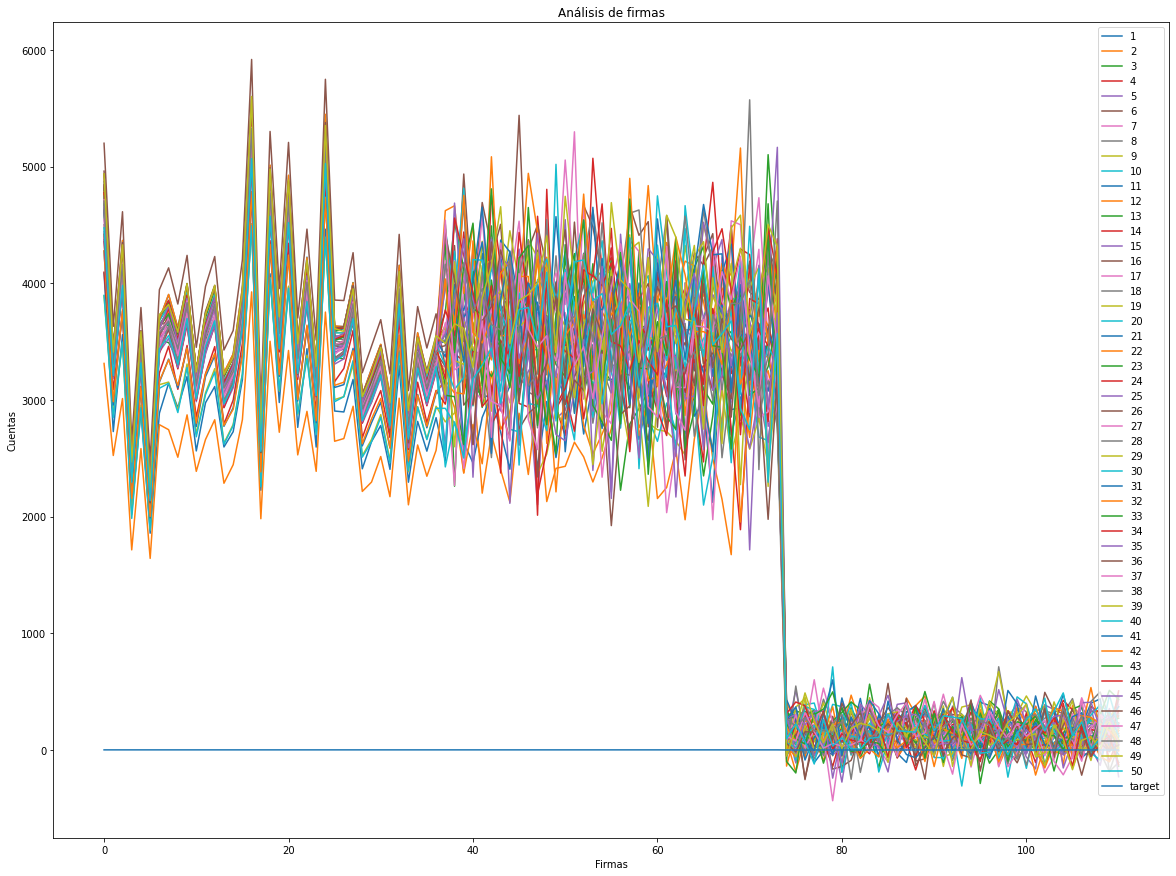

In [18]:
datos_final=[df,sinteticos_positivos,sinteticos_negativos]
df_final=pd.concat(datos_final).reset_index(drop=True)
df_final.to_csv('datos_finales.csv',index=False)
df_final.plot(figsize=(20,15),xlabel="Firmas",ylabel="Cuentas",title="Análisis de firmas")

# Probando que sea el mismo que `imfilter` de Matlab. i.e.

<div>
<p>Aquí la operación que queremos replicar</p>
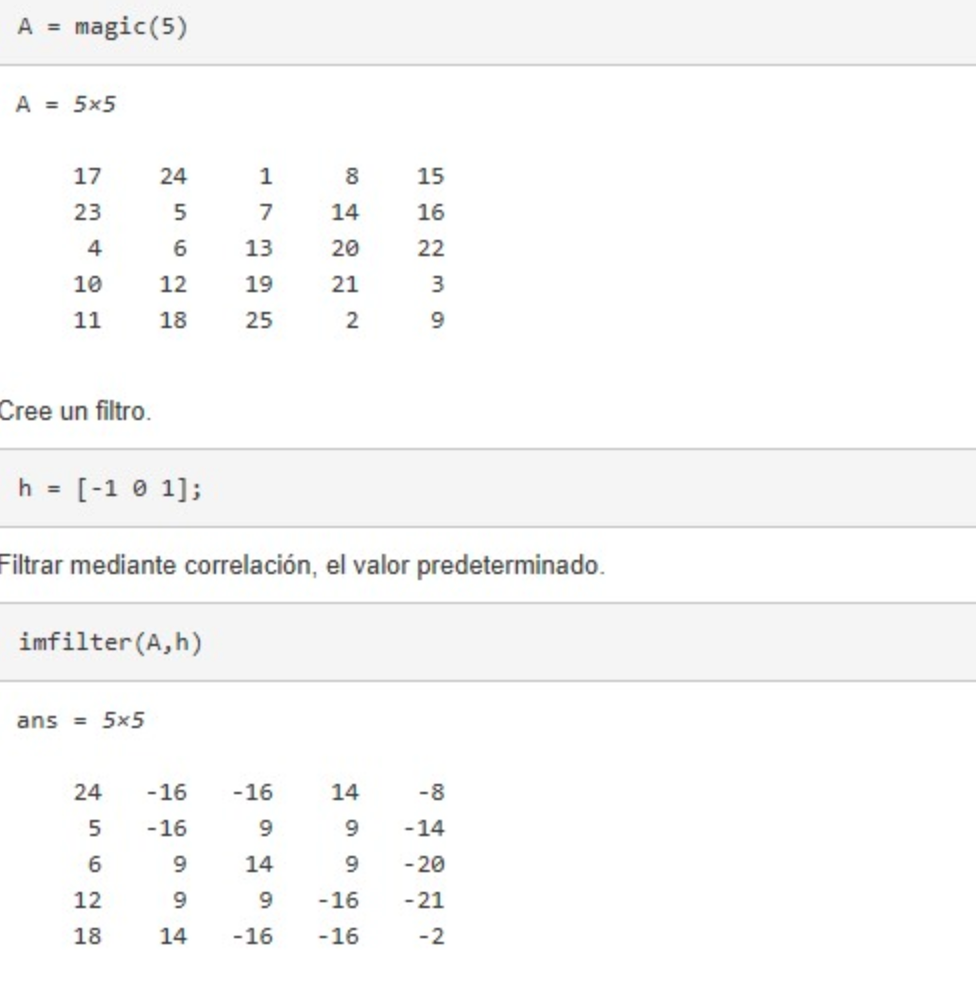
</div>

A es una matrix 5x5 en numpy

In [19]:
A = np.matrix([
    [17,24,1,8,15],
    [23,5,7,14,16],
    [4,6,13,20,22],
    [10,12,19,21,3],
    [11,18,25,2,9]
])

Creamos un filtro

In [20]:
h=np.matrix([-1,0,1])

Filtrar mediante correlación, el valor predeterminado pero en Python

In [21]:
correlate(A,h, mode='constant')

array([[ 24, -16, -16,  14,  -8],
       [  5, -16,   9,   9, -14],
       [  6,   9,  14,   9, -20],
       [ 12,   9,   9, -16, -21],
       [ 18,  14, -16, -16,  -2]])

## Como vemos, obtenemos exactamente el mismo resultado que Matlab